In [1]:
# Imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('hgtest1.csv')

In [3]:
df.columns=['ds','nA']

In [4]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df.ds, df.nA)
plt.xlabel('ds')
plt.ylabel('nA')


In [5]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

## 486nm Graphs and Peak difference

In [12]:
df486 = pd.read_csv('HD_5Angstroms_486.csv')
df486 = df486.reset_index(drop = True)
df486.columns = ['ds', 'nA']

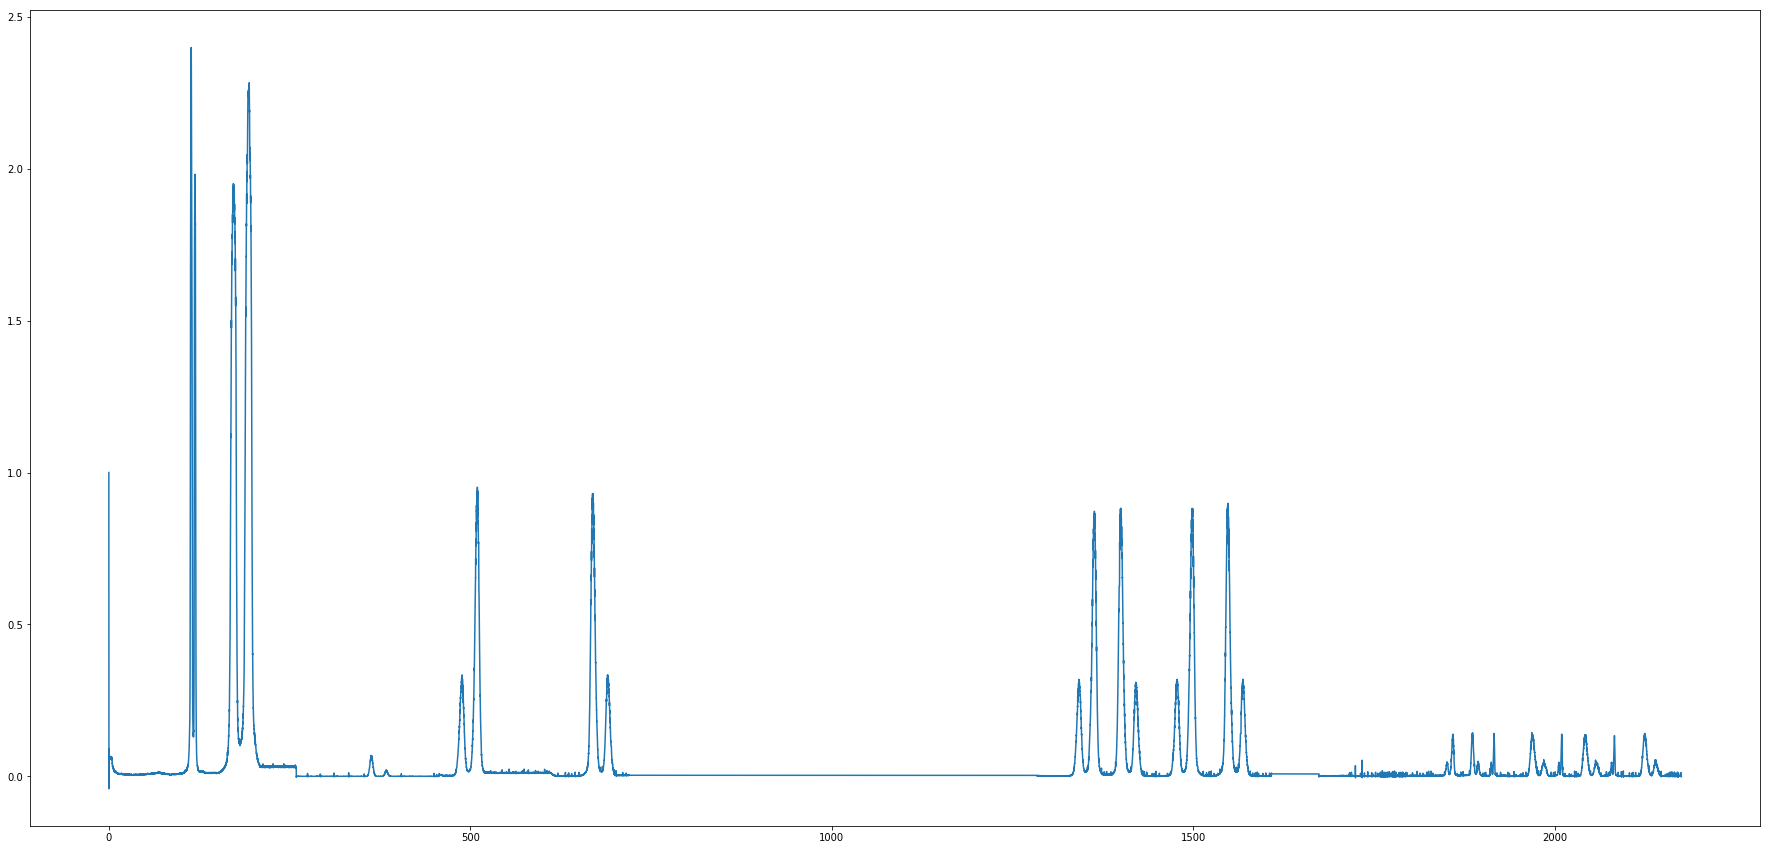

In [13]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df486.ds, df486.nA)
plt.show()

In [14]:
#Attempting to keep a 50 unit wide window
df486a=df486[(df486.ds < 705)&(df486.ds >655)].reset_index(drop=True)

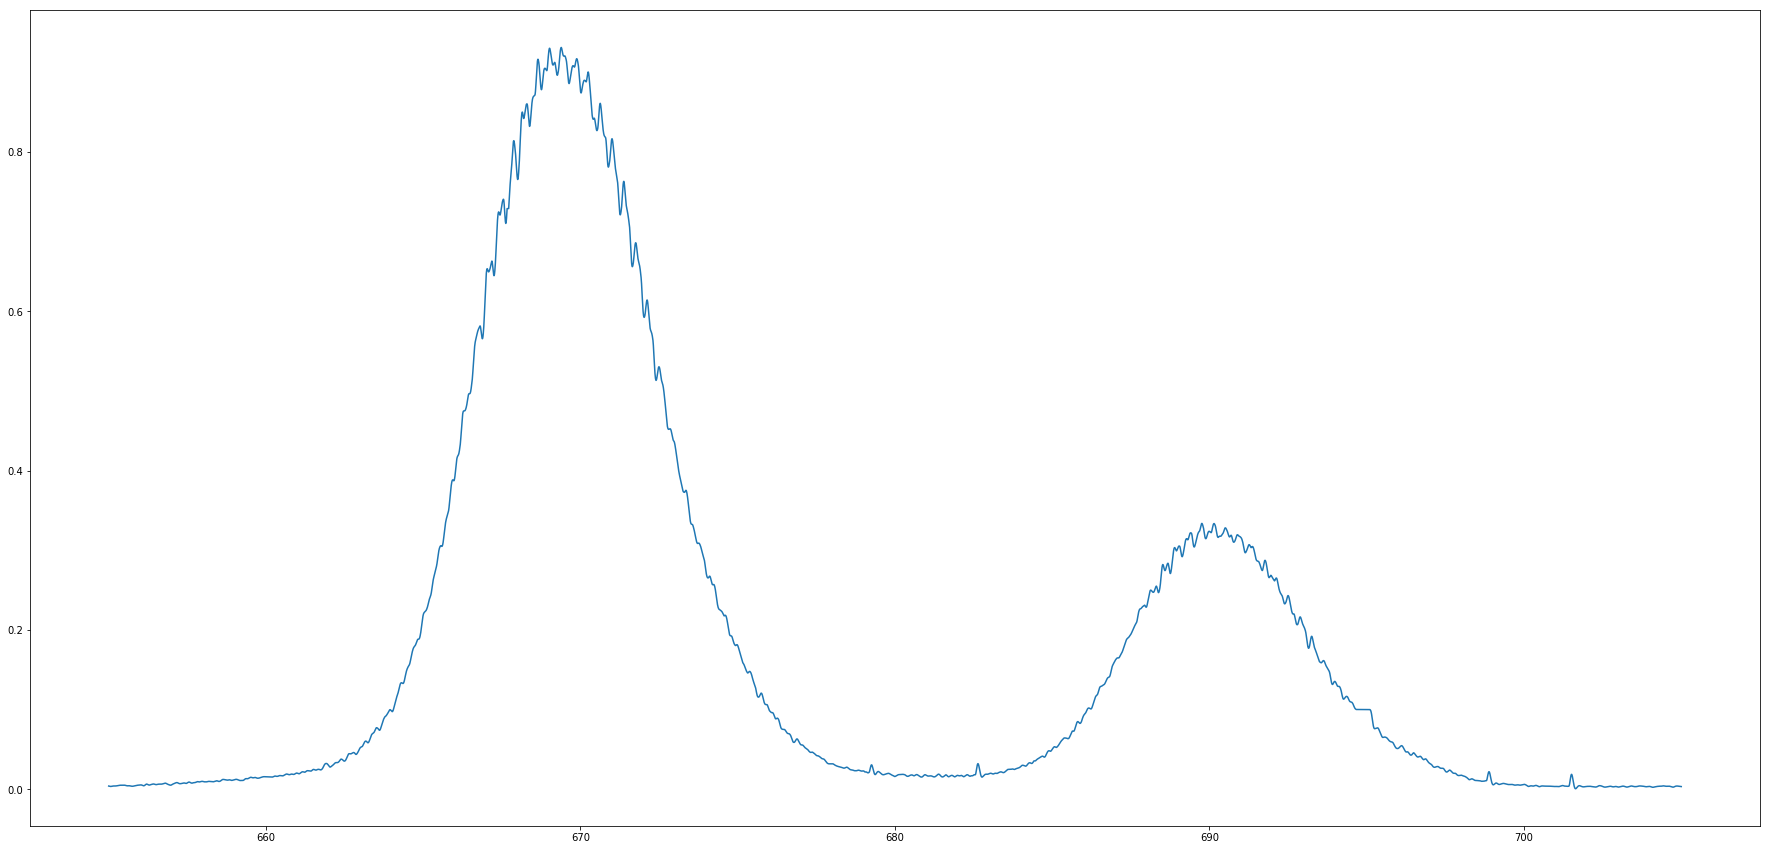

In [15]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df486a.ds, df486a.nA)
plt.show()

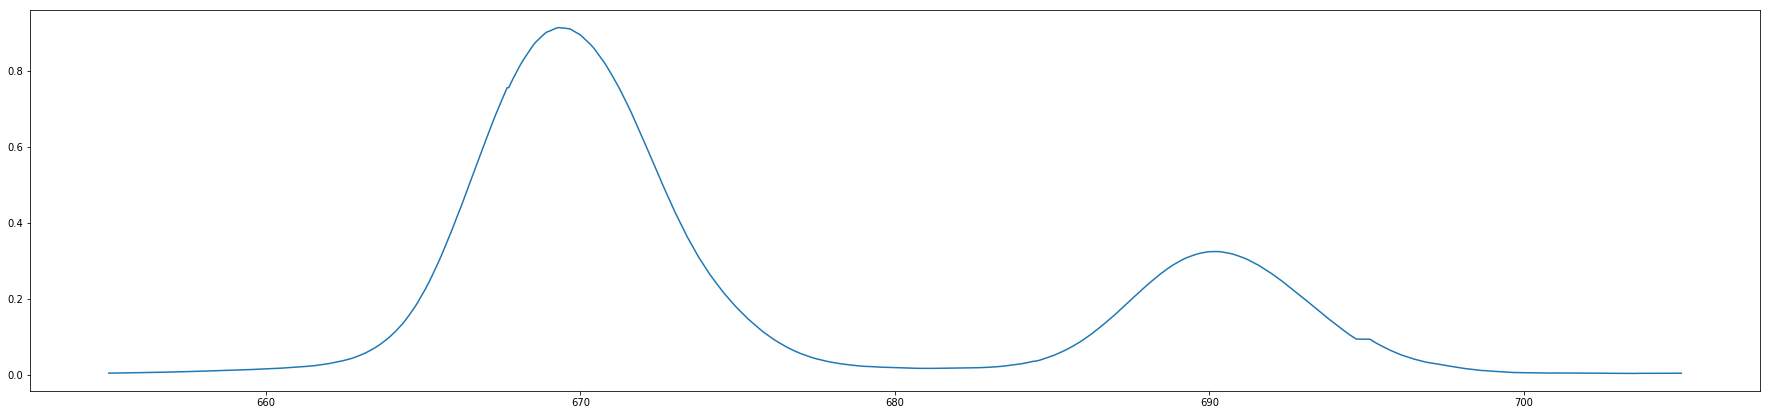

In [16]:
yhat = savitzky_golay(np.asarray(df486a.nA), 20001, 3) # window size 51, polynomial order 3
x486a = np.asarray(df486a.ds)
plt.figure(figsize= (31,7), facecolor = 'w')
plt.plot(x486a, yhat)
plt.show()

In [17]:
#sp.signal.find_peaks_cwt(yhat, x486a)
#peakind = sp.signal.find_peaks_cwt(yhat, x486a)
#peakind, xs[peakind], data[peakind]
#([32], array([ 1.6]), array([ 0.9995736]))

In [18]:
print x486a

[ 655.000192  655.000392  655.000592 ...,  704.99948   704.99968   704.99988 ]


### PeakUtils for peak finding

In [19]:
import peakutils

[ 70837 173878]
(array([ 669.307984,  690.196032]), array([ 0.91423395,  0.3243316 ]))


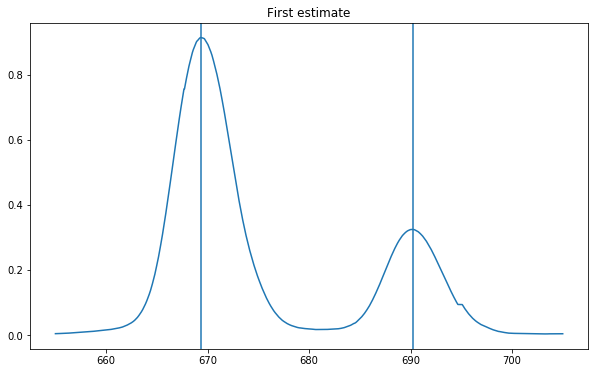

In [20]:
indexes = peakutils.indexes(yhat, thres=0.3, min_dist=300)
print(indexes)
print(x486a[indexes], yhat[indexes])
plt.figure(figsize=(10,6))
plt.plot(x486a, yhat)
plt.axvline(x486a[indexes][0])
plt.axvline(x486a[indexes][1])
plt.title('First estimate')
plt.show()

In [21]:
delta = (x486a[indexes][1] - x486a[indexes][0])

In [22]:
print (delta/12)*10**-10

1.74067066667e-10


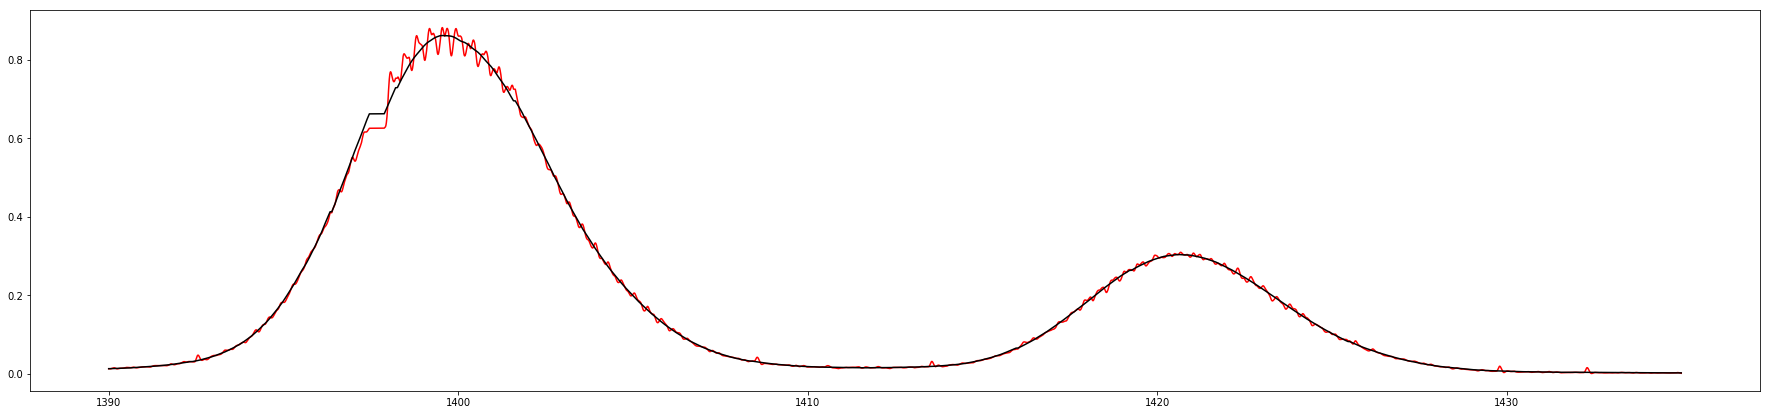

In [23]:
df486b=df486[(df486.ds < 1435)&(df486.ds >1390)].reset_index(drop=True)
yhat = savitzky_golay(np.asarray(df486b.nA), 20001, 3) # window size 51, polynomial order 3
x486b = np.asarray(df486b.ds)
y486b = np.asarray(df486b.nA)
plt.figure(figsize= (31,7), facecolor = 'w')
plt.plot(x486b,y486b, 'r-')
plt.plot(x486b, yhat, 'k-')
plt.show()

[ 44526 147922]
(array([ 1399.535344,  1420.595944]), array([ 0.86210929,  0.30382095]))


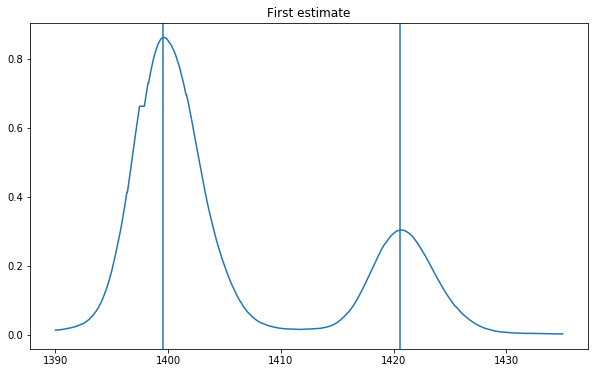

In [24]:
indexes = peakutils.indexes(yhat, thres=0.3, min_dist=300)
print(indexes)
print(x486b[indexes], yhat[indexes])
plt.figure(figsize=(10,6))
plt.plot(x486b, yhat)
plt.axvline(x486b[indexes][0])
plt.axvline(x486b[indexes][1])
plt.title('First estimate')
plt.show()

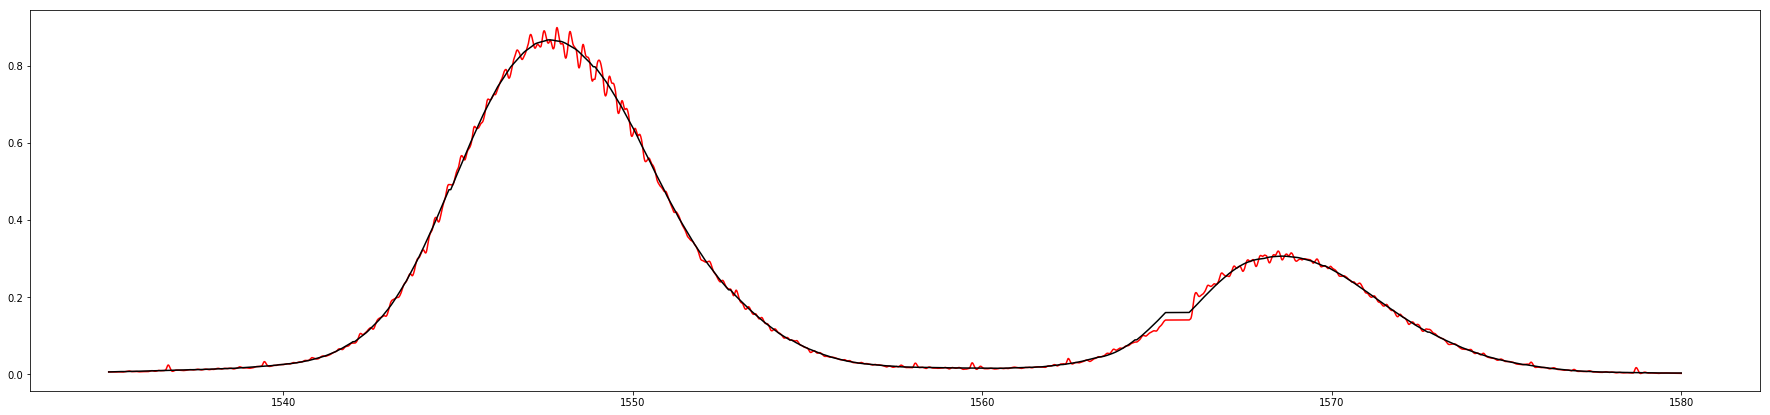

In [25]:
df486c=df486[(df486.ds < 1580)&(df486.ds >1535)].reset_index(drop=True)
yhat = savitzky_golay(np.asarray(df486c.nA), 20001, 3) # window size 51, polynomial order 3
x486c = np.asarray(df486c.ds)
y486c= np.asarray(df486c.nA)
plt.figure(figsize= (31,7), facecolor = 'w')
plt.plot(x486c,y486c, 'r-')
plt.plot(x486c, yhat, 'k-')
plt.show()

[ 61636 160671]
(array([ 1547.602824,  1568.557096]), array([ 0.86682703,  0.30647167]))


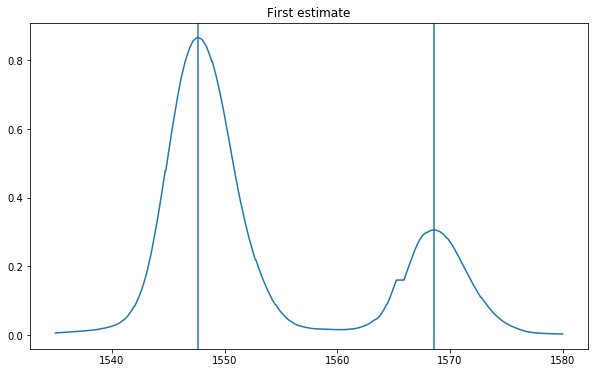

In [26]:
indexes = peakutils.indexes(yhat, thres=0.3, min_dist=300)
print(indexes)
print(x486c[indexes], yhat[indexes])
plt.figure(figsize=(10,6))
plt.plot(x486c, yhat)
plt.axvline(x486c[indexes][0])
plt.axvline(x486c[indexes][1])
plt.title('First estimate')
plt.show()

In [27]:
deltaA = (x486a[indexes][1] - x486a[indexes][0])
print ((deltaA/12)*10**-10)
deltaB = (x486b[indexes][1] - x486b[indexes][0])
print ((deltaB/12)*10**-10)
deltaC = (x486c[indexes][1] - x486c[indexes][0])
print ((deltaC/12)*10**-10)

1.67751733333e-10
1.67777333333e-10
1.74618933333e-10


## 434nm Graphs and Peak Shifts

In [28]:
df486 = pd.read_csv('HD_5Angstroms_434.csv')
df486 = df486.reset_index(drop = True)
df486.columns = ['ds', 'nA']

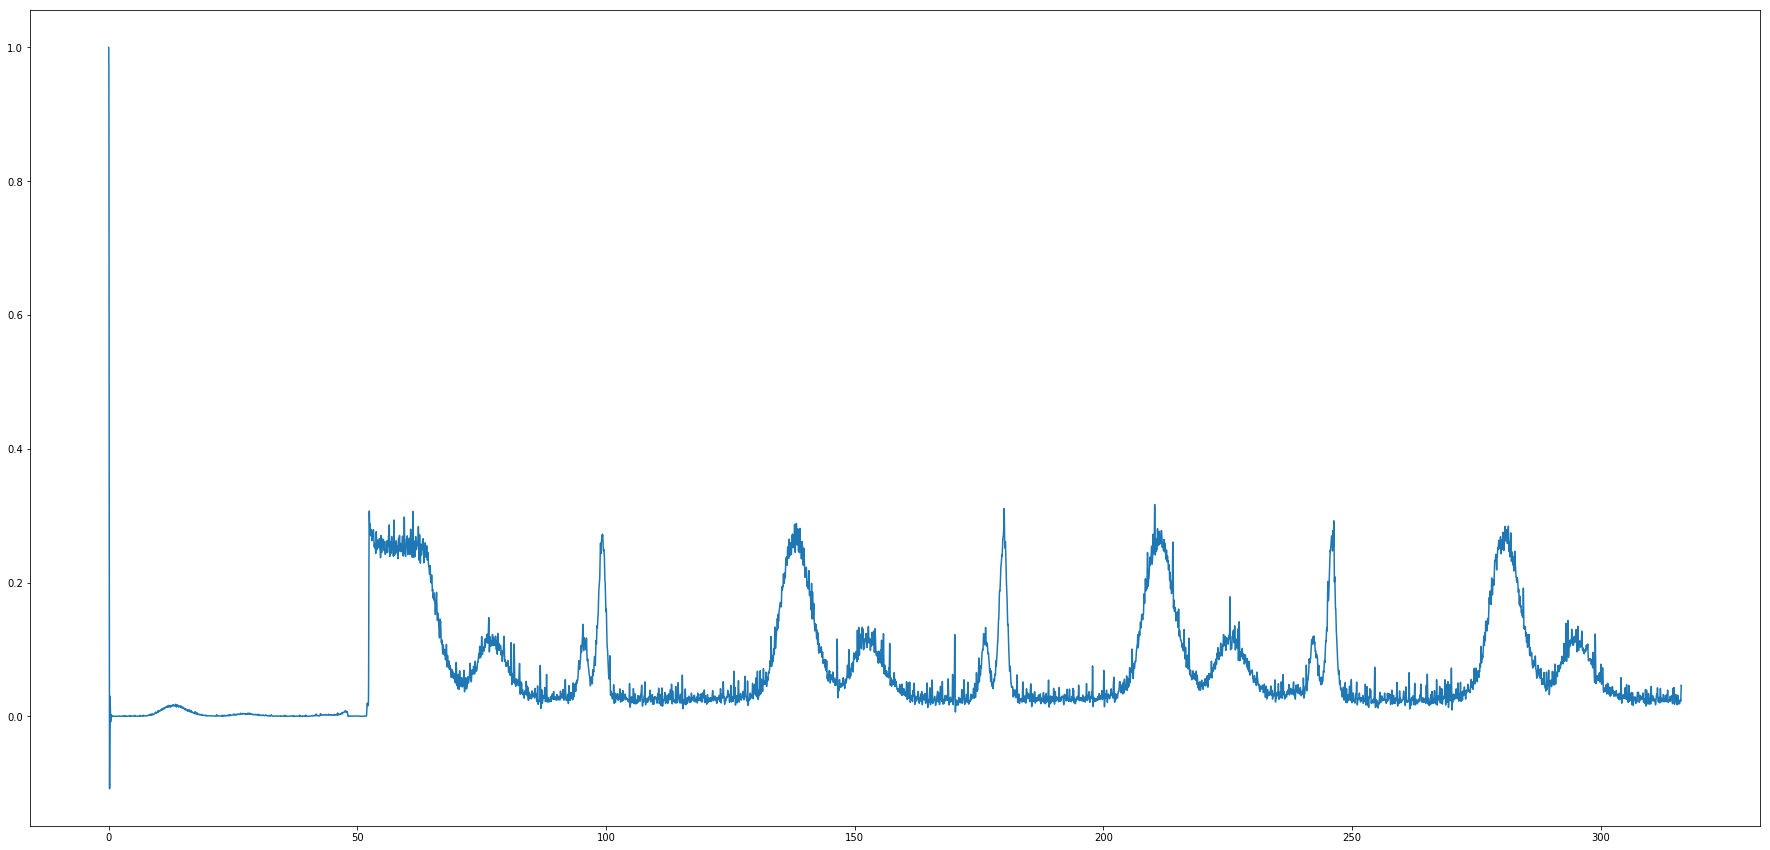

In [29]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df486.ds, df486.nA)
plt.show()